In [22]:
import random
random.seed(42)
num_operations = 5
for op in range(1, num_operations + 1):
    print(f'Operation:{op}')
    successor = max(op + 1 , min(num_operations, int(random.gauss(num_operations, num_operations * 0.1))) ) if op < num_operations else -1
    print(f'Sucessor:{successor}')

Operation:1
Sucessor:4
Operation:2
Sucessor:4
Operation:3
Sucessor:4
Operation:4
Sucessor:5
Operation:5
Sucessor:-1


In [23]:
amount_products = 10
weights = []
for i in range(amount_products):
    # Generate weights with higher values in the middle
    position_factor = abs((amount_products // 2) - i) + 1
    weight = random.gauss(1 / position_factor, 0.2 / position_factor)
    while weight < 0:  # Regenerate if the weight is negative
        weight = random.gauss(1 / position_factor, 0.2 / position_factor)
    weights.append(weight)
total_weight = sum(weights)
sum_products = 0
product_types_relation = {f'p{i}': weight / total_weight for i, weight in enumerate(weights, 1)}
for p in product_types_relation.items():
    print(f'Product types relation: {p}')
    sum_products = sum_products + p[1]
    
print(f'Sum of products: {sum_products}')

Product types relation: ('p1', 0.042656115475117946)
Product types relation: ('p2', 0.036797209906325276)
Product types relation: ('p3', 0.07002363519822885)
Product types relation: ('p4', 0.08286532862158157)
Product types relation: ('p5', 0.1256211346091456)
Product types relation: ('p6', 0.26872577884900584)
Product types relation: ('p7', 0.1374203430240743)
Product types relation: ('p8', 0.10791923441041328)
Product types relation: ('p9', 0.07428255885017046)
Product types relation: ('p10', 0.05368866105593679)
Sum of products: 1.0


In [24]:
weights

[0.16241372387390376,
 0.14010586342636172,
 0.2666159172033858,
 0.31551083476685543,
 0.4783041315854805,
 1.023176957340171,
 0.5232297736906721,
 0.41090391243994284,
 0.28283182533993345,
 0.20442028709775328]

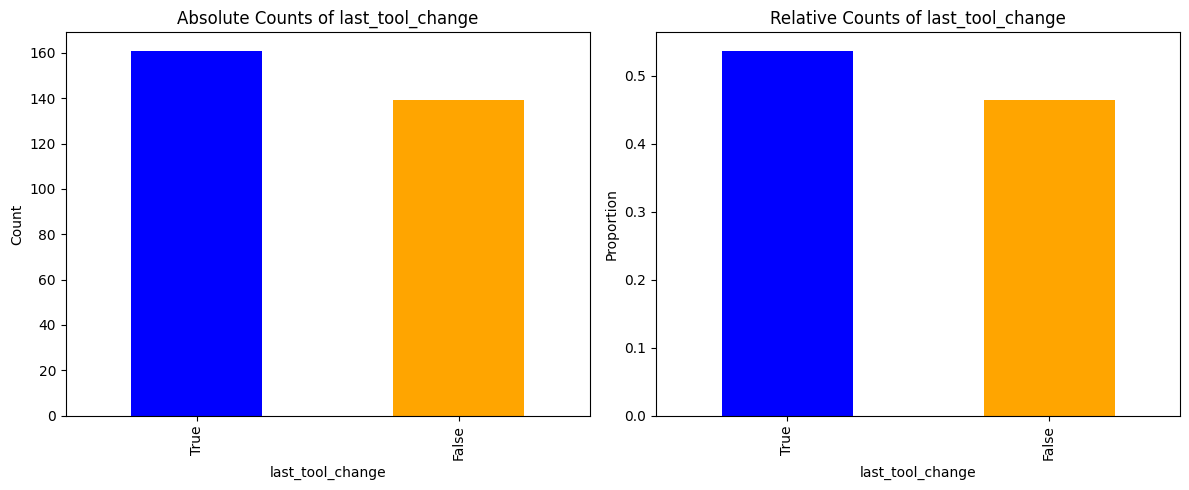

In [25]:
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt


df = pd.read_csv("./data/data_observe.csv", sep=",")

# Calculate absolute counts
absolute_counts = df['last_tool_change'].value_counts()

# Calculate relative counts
relative_counts = df['last_tool_change'].value_counts(normalize=True)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Absolute counts histogram
absolute_counts.plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Absolute Counts of last_tool_change')
axes[0].set_xlabel('last_tool_change')
axes[0].set_ylabel('Count')

# Relative counts histogram
relative_counts.plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Relative Counts of last_tool_change')
axes[1].set_xlabel('last_tool_change')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import pandas as pd
# Initialize distributions dictionary
distributions = {}

# Define mean and variance for each combination of 'machine_state' and 'cleaning'
combinations = [
    ((0, 0), {'mean': 1.0, 'variance': 0.1}),
    ((0, 1), {'mean': 1.0, 'variance': 0.15}),
    ((1, 0), {'mean': 1.0, 'variance': 0.2}),
    ((1, 1), {'mean': 1.0, 'variance': 0.25}),
]

# Populate the distributions dictionary
for (machine_state, cleaning), stats in combinations:
    distributions[('relative_processing_time_deviation', tuple({'machine_state': machine_state, 'cleaning': cleaning}.items()))] = stats

# Create parent_values using machine_state and cleaning variables
parent_values = (('machine_state', 1), ('cleaning', 1))
# Check if the parent combination exists in the learned distributions
key = ('relative_processing_time_deviation', parent_values)
if key in distributions:
    params = distributions[key]
    mean = params['mean']
    variance = params['variance']
    std_dev = np.sqrt(variance)
    
    # Sample from the Gaussian distribution
    relative_processing_time_deviation = np.random.normal(mean, std_dev)
else:
    print(f"No distribution found for parent values: {parent_values}. Using default mean and variance.")

# Create a pandas DataFrame from the sampled data
df = pd.DataFrame({'relative_processing_time_deviation': [np.random.normal(mean, std_dev) for _ in range(1000000)]})

#print(df.head(25))
# Display the descriptive statistics of the DataFrame
print(df.describe())


       relative_processing_time_deviation
count                      1000000.000000
mean                             0.999604
std                              0.500434
min                             -1.514962
25%                              0.662260
50%                              0.998978
75%                              1.337054
max                              3.378122


In [27]:
import numpy as np
import pandas as pd

# Initialize distributions dictionary
distributions = {}

# Define mean and variance for each combination of 'machine_state' and 'cleaning'
combinations = [
    ((0, 0), {'mean': 1.0, 'variance': 0.1}),
    ((0, 1), {'mean': 1.0, 'variance': 0.15}),
    ((1, 0), {'mean': 1.0, 'variance': 0.2}),
    ((1, 1), {'mean': 1.0, 'variance': 0.25}),
]

# Populate the distributions dictionary
for (machine_state, cleaning), stats in combinations:
    distributions[('relative_processing_time_deviation', tuple({'machine_state': machine_state, 'cleaning': cleaning}.items()))] = stats

# Create parent_values using machine_state and cleaning variables
parent_values = (('machine_state', 1), ('cleaning', 1))

# Check if the parent combination exists in the learned distributions
key = ('relative_processing_time_deviation', parent_values)
if key in distributions:
    params = distributions[key]
    mean = params['mean']
    variance = params['variance']

    # Convert lognormal mean/variance to mu/sigma for underlying normal
    sigma_squared = np.log(1 + (variance / (mean ** 2)))
    sigma = np.sqrt(sigma_squared)
    mu = np.log(mean) - (sigma_squared / 2)

    # Sample from lognormal distribution
    sampled_data = np.random.lognormal(mean=mu, sigma=sigma, size=1_000_000)
    df = pd.DataFrame({'relative_processing_time_deviation': sampled_data})
    
    # Display descriptive statistics
    print(df.describe())
else:
    print(f"No distribution found for parent values: {parent_values}. Using default mean and variance.")


       relative_processing_time_deviation
count                      1000000.000000
mean                             1.000448
std                              0.499473
min                              0.089804
25%                              0.651374
50%                              0.895054
75%                              1.230698
max                              8.124453


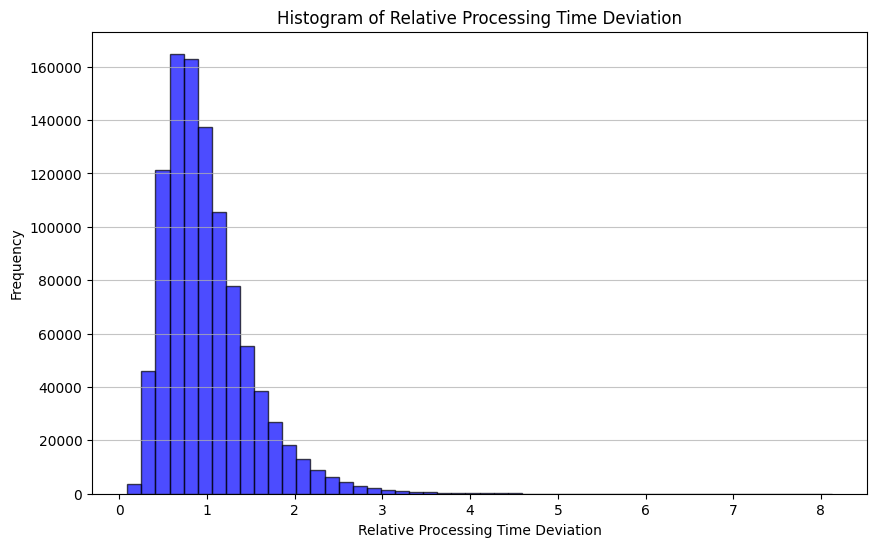

In [28]:
import matplotlib.pyplot as plt

# Plot histogram for the 'relative_processing_time_deviation' column
plt.figure(figsize=(10, 6))
plt.hist(df['relative_processing_time_deviation'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Relative Processing Time Deviation')
plt.xlabel('Relative Processing Time Deviation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [8]:
import modules.metrics as metrics

# Calculate Levenshtein distance and NDCG
# between two lists of names
# Example lists
A = ["Pers1", "Person2", "Person3", "Person4", "Person5"]

# Case 1: Only one is swapped
B1 = ["Person1", "Person3", "Person2", "Person4", "Person5"]
print("Case 1 - One swapped:")
print(f'Levenshtein: {metrics.list_distance(A, B1)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B1)}')

# Case 2: One is missing in the second list
B2 = ["Person1", "Person2", "Person4", "Person5"]
print("\nCase 2 - One missing:")
print(f'Levenshtein: {metrics.list_distance(A, B2)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B2)}')

# Case 3: All are the same
B3 = ["Person1", "Person2", "Person3", "Person4", "Person5"]
print("\nCase 3 - All the same:")
print(f'Levenshtein: {metrics.list_distance(A, B3)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B3)}')

# Case 4: Nothing is the same
B4 = ["Person6", "Person7", "Person8", "Person9", "Person10"]
print("\nCase 4 - Nothing the same:")
print(f'Levenshtein: {metrics.list_distance(A, B4)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B4)}')


B5 = ["Person2", "Person1", "Person4", "Person5", "Person3"]
print("\nCase 5 - Same rank but different order:")
print(f'Levenshtein: {metrics.list_distance(A, B5)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B5)}')

B6 = ["Person2", "Person7", "Person4", "Person8", "Person3"]
print("\nCase 6 - 2 new one:")
print(f'Levenshtein: {metrics.list_distance(A, B6)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B6)}')



Case 1 - One swapped:
Levenshtein: 3
NDCG: 0.40613026819923376

Case 2 - One missing:
Levenshtein: 2
NDCG: 0.33524904214559387

Case 3 - All the same:
Levenshtein: 1
NDCG: 0.4252873563218391

Case 4 - Nothing the same:
Levenshtein: 5
NDCG: 0.0

Case 5 - Same rank but different order:
Levenshtein: 3
NDCG: 0.6340996168582376

Case 6 - 2 new one:
Levenshtein: 4
NDCG: 0.6053639846743295


In [30]:
# Minimal example: Difference between evidence and do-intervention in pgmpy

import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination, CausalInference

# 1. Define a simple causal model: A -> B
model = BayesianNetwork([('A', 'B')])

# 2. Define CPDs
cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.7], [0.3]])
cpd_b = TabularCPD(variable='B', variable_card=2, 
                   values=[[0.9, 0.2],   # P(B=0|A=0), P(B=0|A=1)
                           [0.1, 0.8]],  # P(B=1|A=0), P(B=1|A=1)
                   evidence=['A'], evidence_card=[2])

model.add_cpds(cpd_a, cpd_b)
assert model.check_model()

# 3. Inference objects
ve = VariableElimination(model)
ci = CausalInference(model)

# 4. Standard inference: P(B | A=1)
result_evidence = ve.query(variables=['B'], evidence={'A': 1})
print("P(B | A=1):")
print(result_evidence)

# 5. Do-intervention: P(B | do(A=1))
result_do = ci.query(variables=['B'], do={'A': 1})
print("\nP(B | do(A=1)):")
print(result_do)

# 6. Compare with P(B)
result_prior = ve.query(variables=['B'])
print("\nP(B):")
print(result_prior)

/home/marvin/repo/PlanCausal/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


P(B | A=1):
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.2000 |
+------+----------+
| B(1) |   0.8000 |
+------+----------+

P(B | do(A=1)):
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.2000 |
+------+----------+
| B(1) |   0.8000 |
+------+----------+

P(B):
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6900 |
+------+----------+
| B(1) |   0.3100 |
+------+----------+


In [31]:
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination, CausalInference

# 1. Define your model structure
model = BayesianNetwork([
    ('last_tool_change', 'machine_state'),
    ('machine_state', 'relative_processing_time_deviation'),
    ('machine_state', 'cleaning'),
    ('cleaning', 'relative_processing_time_deviation')
])

# 2. Define CPDs
cpd_last_tool_change = TabularCPD(
    variable='last_tool_change', 
    variable_card=2,
    values=[[0.6], [0.4]]
)
cpd_machine_state = TabularCPD(
    variable='machine_state', 
    variable_card=2,
    values=[
        [0.9, 0.4],
        [0.1, 0.6]
    ],
    evidence=['last_tool_change'],
    evidence_card=[2]
)
cpd_cleaning = TabularCPD(
    variable='cleaning', 
    variable_card=2,
    values=[
        [0.95, 0.15],
        [0.05, 0.85]
    ],
    evidence=['machine_state'],
    evidence_card=[2]
)
cpd_relative_processing_time_deviation = TabularCPD(
    variable='relative_processing_time_deviation', 
    variable_card=3,
    values=[
        [0.08, 0.10, 0.02, 0.04],  # 0.9
        [0.60, 0.85, 0.31, 0.40],  # 1.0
        [0.32, 0.05, 0.67, 0.56]   # 1.2
    ],
    evidence=['machine_state', 'cleaning'],
    evidence_card=[2, 2]
)

model.add_cpds(
    cpd_last_tool_change, 
    cpd_machine_state, 
    cpd_cleaning, 
    cpd_relative_processing_time_deviation
)
assert model.check_model()

# 3. Inference objects
ve = VariableElimination(model)
ci = CausalInference(model)

# 4. Observational inference: P(relative_processing_time_deviation | last_tool_change=1)
obs_result = ve.query(
    variables=['relative_processing_time_deviation'],
    evidence={'last_tool_change': 1}
)
print("P(relative_processing_time_deviation | last_tool_change=1):")
print(obs_result)

# 5. Interventional inference: P(relative_processing_time_deviation | do(cleaning=1), last_tool_change=1)
do_result = ci.query(
    variables=['relative_processing_time_deviation'],
    evidence={'last_tool_change': 1},
    do={'cleaning': 1}
)

# Interventional inference: P(relative_processing_time_deviation | do(cleaning=0), last_tool_change=0)
do_result1_last_tool_change_0 = ci.query(
    variables=['relative_processing_time_deviation'],
    evidence={'last_tool_change': 0},
    do={'cleaning': 1}
)
print("\nP(relative_processing_time_deviation | do(cleaning=1), last_tool_change=0):")
print(do_result1_last_tool_change_0)
print("\nP(relative_processing_time_deviation | do(cleaning=1), last_tool_change=1):")
print(do_result)



# 6. Interventional inference: P(relative_processing_time_deviation | do(cleaning=0), last_tool_change=1)
do_result0 = ci.query(
    variables=['relative_processing_time_deviation'],
    evidence={'last_tool_change': 1},
    do={'cleaning': 0}
)
# Interventional inference: P(relative_processing_time_deviation | do(cleaning=0), last_tool_change=0)
do_result0_last_tool_change_0 = ci.query(
    variables=['relative_processing_time_deviation'],
    evidence={'last_tool_change': 0},
    do={'cleaning': 0}
)
print("\nP(relative_processing_time_deviation | do(cleaning=0), last_tool_change=0):")
print(do_result0_last_tool_change_0)
print("\nP(relative_processing_time_deviation | do(cleaning=0), last_tool_change=1):")
print(do_result0)

P(relative_processing_time_deviation | last_tool_change=1):
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation    |   phi(relative_processing_time_deviation) |
+=======================================+===========================================+
| relative_processing_time_deviation(0) |                                    0.0546 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(1) |                                    0.4769 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(2) |                                    0.4685 |
+---------------------------------------+-------------------------------------------+


100%|██████████| 2/2 [00:00<00:00, 5691.05it/s]



P(relative_processing_time_deviation | do(cleaning=1), last_tool_change=0):
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation    |   phi(relative_processing_time_deviation) |
+=======================================+===========================================+
| relative_processing_time_deviation(0) |                                    0.0940 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(1) |                                    0.8050 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(2) |                                    0.1010 |
+---------------------------------------+-------------------------------------------+

P(relative_processing_time_deviation | do(cleaning=1), last_tool_change=1):
+---------------------------------------+-------------------------------

100%|██████████| 2/2 [00:00<00:00, 5870.26it/s]


P(relative_processing_time_deviation | do(cleaning=0), last_tool_change=0):
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation    |   phi(relative_processing_time_deviation) |
+=======================================+===========================================+
| relative_processing_time_deviation(0) |                                    0.0740 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(1) |                                    0.5710 |
+---------------------------------------+-------------------------------------------+
| relative_processing_time_deviation(2) |                                    0.3550 |
+---------------------------------------+-------------------------------------------+

P(relative_processing_time_deviation | do(cleaning=0), last_tool_change=1):
+---------------------------------------+-------------------------------

100%|██████████| 2/2 [00:00<00:00, 5675.65it/s]


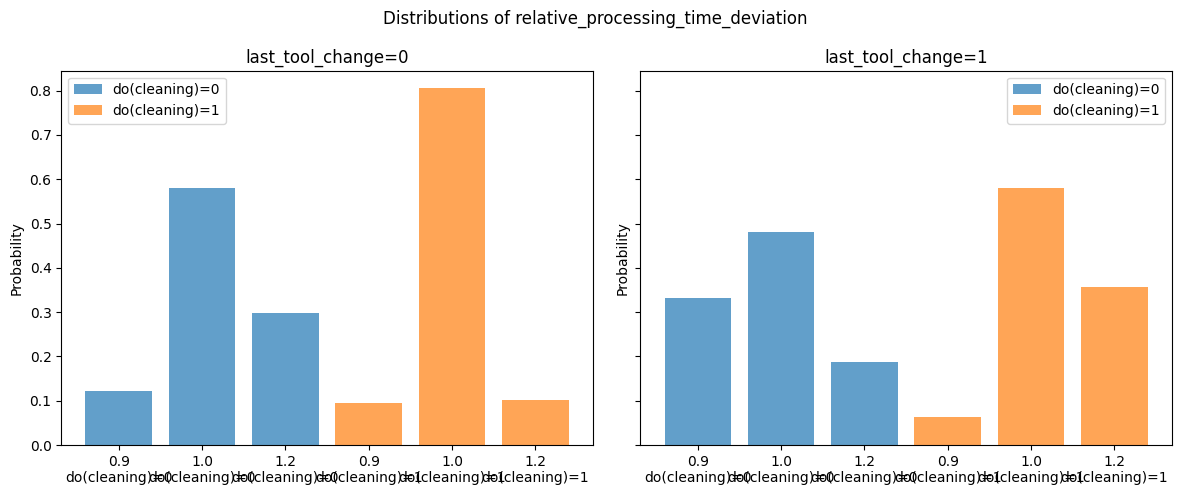


last_tool_change=0:
  E[deviation | do(cleaning=0)] = 1.047
  E[deviation | do(cleaning=1)] = 1.011
  => Optimal: CLEAN

last_tool_change=1:
  E[deviation | do(cleaning=0)] = 1.004
  E[deviation | do(cleaning=1)] = 1.065
  => Optimal: do NOT clean


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination, CausalInference

# Model definition (as before)
model = BayesianNetwork([
    ('last_tool_change', 'machine_state'),
    ('machine_state', 'relative_processing_time_deviation'),
    ('machine_state', 'cleaning'),
    ('cleaning', 'relative_processing_time_deviation')
])
cpd_last_tool_change = TabularCPD(
    variable='last_tool_change', variable_card=2, values=[[0.6], [0.4]]
)
cpd_machine_state = TabularCPD(
    variable='machine_state', variable_card=2,
    values=[[0.9, 0.4], [0.1, 0.6]],
    evidence=['last_tool_change'], evidence_card=[2]
)
cpd_cleaning = TabularCPD(
    variable='cleaning', variable_card=2,
    values=[[0.95, 0.15], [0.05, 0.85]],
    evidence=['machine_state'], evidence_card=[2]
)
cpd_relative_processing_time_deviation = TabularCPD(
    variable='relative_processing_time_deviation', 
    variable_card=3,
    #Column1: machine_state=0, cleaning=0
    #Column2: machine_state=0, cleaning=1
    #Column3:  machine_state=1, cleaning=0
    #Column4:  machine_state=1, cleaning=1
    values=[
        [0.08, 0.10, 0.50, 0.04],  # 0.9
        [0.60, 0.85, 0.40, 0.40],  # 1.0
        [0.32, 0.05, 0.10, 0.56]   # 1.2
    ],
    evidence=['machine_state', 'cleaning'],
    evidence_card=[2, 2]
)
model.add_cpds(
    cpd_last_tool_change, cpd_machine_state, cpd_cleaning, cpd_relative_processing_time_deviation
)
assert model.check_model()

ve = VariableElimination(model)
ci = CausalInference(model)

# Mapping for interpretation
deviation_map = {0: 0.9, 1: 1.0, 2: 1.2}

def expected_deviation(factor):
    return sum(factor.values[i] * deviation_map[i] for i in range(3))

results = []
for last_tool_change in [0, 1]:
    for cleaning in [0, 1]:
        factor = ci.query(
            variables=['relative_processing_time_deviation'],
            evidence={'last_tool_change': last_tool_change},
            do={'cleaning': cleaning}
        )
        exp = expected_deviation(factor)
        results.append({
            'last_tool_change': last_tool_change,
            'do_cleaning': cleaning,
            'expected_deviation': exp,
            'distribution': factor.values
        })

# Convert to DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(results)

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
x = [0.9, 1.0, 1.2]
for idx, last_tool_change in enumerate([0, 1]):
    for cleaning in [0, 1]:
        row = df[(df['last_tool_change'] == last_tool_change) & (df['do_cleaning'] == cleaning)]
        label = f"do(cleaning)={cleaning}"
        axes[idx].bar(
            [str(xx) + f"\n{label}" for xx in x],
            row['distribution'].values[0],
            alpha=0.7,
            label=label
        )
    axes[idx].set_title(f"last_tool_change={last_tool_change}")
    axes[idx].set_ylabel("Probability")
    axes[idx].legend()
plt.suptitle("Distributions of relative_processing_time_deviation")
plt.tight_layout()
plt.show()

# Print expected deviations and recommend action
for last_tool_change in [0, 1]:
    row0 = df[(df['last_tool_change'] == last_tool_change) & (df['do_cleaning'] == 0)]
    row1 = df[(df['last_tool_change'] == last_tool_change) & (df['do_cleaning'] == 1)]
    print(f"\nlast_tool_change={last_tool_change}:")
    print(f"  E[deviation | do(cleaning=0)] = {row0['expected_deviation'].values[0]:.3f}")
    print(f"  E[deviation | do(cleaning=1)] = {row1['expected_deviation'].values[0]:.3f}")
    if row0['expected_deviation'].values[0] < row1['expected_deviation'].values[0]:
        print("  => Optimal: do NOT clean")
    else:
        print("  => Optimal: CLEAN")

In [1]:
import numpy as np
import random
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

# 1. Define a model where context matters
model = BayesianNetwork([
    ('last_tool_change', 'machine_state'),
    ('machine_state', 'relative_processing_time_deviation'),
    ('machine_state', 'cleaning'),
    ('cleaning', 'relative_processing_time_deviation')
])
cpd_last_tool_change = TabularCPD('last_tool_change', 2, [[0.5], [0.5]])
cpd_machine_state = TabularCPD('machine_state', 2, [[0.8, 0.3], [0.2, 0.7]], evidence=['last_tool_change'], evidence_card=[2])
cpd_cleaning = TabularCPD('cleaning', 2, [[0.7, 0.2], [0.3, 0.8]], evidence=['machine_state'], evidence_card=[2])
# Context-sensitive CPD: cleaning only helps if machine_state=1
cpd_relative_processing_time_deviation = TabularCPD(
    variable='relative_processing_time_deviation', 
    variable_card=3,
    # Columns: [ms=0, c=0], [ms=0, c=1], [ms=1, c=0], [ms=1, c=1]
    values=[
        [0.1, 0.1, 0.1, 0.1],  # P(0.9)
        [0.2, 0.7, 0.7, 0.2],  # P(1.0)
        [0.7, 0.2, 0.2, 0.7],  # P(1.2)
    ],
    evidence=['machine_state', 'cleaning'],
    evidence_card=[2, 2]
)
model.add_cpds(cpd_last_tool_change, cpd_machine_state, cpd_cleaning, cpd_relative_processing_time_deviation)
assert model.check_model()
ci = CausalInference(model)
deviation_map = {0: 0.9, 1: 1.0, 2: 1.2}

# 2. Simulate a sequence of operations
n_ops = 500
np.random.seed(77)
last_tool_changes = np.random.choice([0, 1], size=n_ops)
base_duration = 10

cbn_times = []
always_clean_times = []
never_clean_times = []

for ltc in last_tool_changes:
    base_duration = random.choice([10, 20, 30])
    # CBN-based: choose cleaning if E[deviation|do(cleaning=1)] < E[deviation|do(cleaning=0)]
    factor_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 1},show_progress=False)
    factor_no_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 0},show_progress=False)
    exp_clean = sum(factor_clean.values[i] * deviation_map[i] for i in range(3))
    exp_no_clean = sum(factor_no_clean.values[i] * deviation_map[i] for i in range(3))
    if exp_clean < exp_no_clean:
        cbn_times.append(base_duration * exp_clean)
    else:
        cbn_times.append(base_duration * exp_no_clean)
    # Baselines
    always_clean_times.append(base_duration * exp_clean)
    never_clean_times.append(base_duration * exp_no_clean)

# 3. Compare results
print(f"Mean CBN-based: {np.mean(cbn_times):.3f}")
print(f"Mean Always clean: {np.mean(always_clean_times):.3f}")
print(f"Mean Never clean: {np.mean(never_clean_times):.3f}")

/home/marvin/repo/PlanCausal/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mean CBN-based: 21.665
Mean Always clean: 22.059
Mean Never clean: 22.307


In [2]:
import numpy as np
import random
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

# 1. Define a model where context matters
model = BayesianNetwork([
    ('last_tool_change', 'machine_state'),
    ('machine_state', 'relative_processing_time_deviation'),
    ('machine_state', 'cleaning'),
    ('cleaning', 'relative_processing_time_deviation')
])

# Update CPD for 'last_tool_change' to have 5 states
cpd_last_tool_change = TabularCPD(
    variable='last_tool_change', 
    variable_card=5,  # 5 states: 0, 1, 2, 3, 4
    values=[
        [0.2],  # P(last_tool_change=0)
        [0.2],  # P(last_tool_change=1)
        [0.2],  # P(last_tool_change=2)
        [0.2],  # P(last_tool_change=3)
        [0.2]   # P(last_tool_change=4)
    ]
)

# Update CPD for 'machine_state' to account for 5 states of 'last_tool_change'
# Using a normal distribution-like pattern for probabilities
cpd_machine_state = TabularCPD(
    variable='machine_state', 
    variable_card=2,  # 2 states: 0 and 1
    values=[
    [0.8, 0.6, 0.5, 0.6, 0.2],  # P(machine_state=0 | last_tool_change)
    [0.2, 0.4, 0.5, 0.4, 0.8]   # P(machine_state=1 | last_tool_change)
    ],
    evidence=['last_tool_change'],  # Parent node
    evidence_card=[5]  # Number of states of parent
)

cpd_cleaning = TabularCPD(
    variable='cleaning', 
    variable_card=2,  # 2 states: 0 and 1
    values=[
        [0.7, 0.2],  # P(cleaning=0 | machine_state)
        [0.3, 0.8]   # P(cleaning=1 | machine_state)
    ],
    evidence=['machine_state'],  # Parent node
    evidence_card=[2]  # Number of states of parent
)

cpd_relative_processing_time_deviation = TabularCPD(
    variable='relative_processing_time_deviation', 
    variable_card=3,  # 3 states: 0.9, 1.0, 1.2
    values=[
        [0.7, 0.1, 0.1, 0.7],  # P(0.9)
        [0.2, 0.7, 0.7, 0.2],  # P(1.0)
        [0.1, 0.2, 0.2, 0.1],  # P(1.2)
    ],
    evidence=['machine_state', 'cleaning'],
    evidence_card=[2, 2]
)
model.add_cpds(cpd_last_tool_change, cpd_machine_state, cpd_cleaning, cpd_relative_processing_time_deviation)
assert model.check_model()
ci = CausalInference(model)
deviation_map = {0: 0.9, 1: 1.0, 2: 1.2}

# 2. Simulate a sequence of operations
n_ops = 500
np.random.seed(77)
last_tool_changes = np.random.choice([0, 1], size=n_ops)
base_duration = 10

cbn_times = []
always_clean_times = []
never_clean_times = []

for ltc in last_tool_changes:
    base_duration = random.choice([10, 20, 30])
    # CBN-based: choose cleaning if E[deviation|do(cleaning=1)] < E[deviation|do(cleaning=0)]
    factor_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 1},show_progress=False)
    factor_no_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 0},show_progress=False)
    exp_clean = sum(factor_clean.values[i] * deviation_map[i] for i in range(3))
    exp_no_clean = sum(factor_no_clean.values[i] * deviation_map[i] for i in range(3))
    if exp_clean < exp_no_clean:
        cbn_times.append(base_duration * exp_clean)
    else:
        cbn_times.append(base_duration * exp_no_clean)
    # Baselines
    always_clean_times.append(base_duration * exp_clean)
    never_clean_times.append(base_duration * exp_no_clean)

# 3. Compare results
print(f"Mean CBN-based: {np.mean(cbn_times):.3f}")
print(f"Mean Always clean: {np.mean(always_clean_times):.3f}")
print(f"Mean Never clean: {np.mean(never_clean_times):.3f}")

Mean CBN-based: 19.091
Mean Always clean: 19.717
Mean Never clean: 19.091


In [30]:
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

# 1. Define a model where context matters
model = BayesianNetwork([
    ('last_tool_change', 'machine_state'),
    ('machine_state', 'relative_processing_time_deviation'),
    ('machine_state', 'cleaning'),
    ('cleaning', 'relative_processing_time_deviation'),
    ('product_complexity', 'relative_processing_time_deviation')
])
cpd_last_tool_change = TabularCPD('last_tool_change', 2, [[0.5], [0.5]])
cpd_product_complexity = TabularCPD(
    variable='product_complexity',
    variable_card=3,
    values=[[0.3], [0.4], [0.3]]  # Example: 30% low, 40% middle, 30% high
)
cpd_machine_state = TabularCPD('machine_state', 2, [[0.8, 0.3], [0.2, 0.7]], evidence=['last_tool_change'], evidence_card=[2])
cpd_cleaning = TabularCPD('cleaning', 2, [[0.7, 0.2], [0.3, 0.8]], evidence=['machine_state'], evidence_card=[2])
# Context-sensitive CPD: cleaning only helps if machine_state=1
cpd_relative_processing_time_deviation = TabularCPD(
    variable='relative_processing_time_deviation',
    variable_card=3,
    values=[
        # 12 columns: ms=0,c=0,pc=0; ms=0,c=0,pc=1; ms=0,c=0,pc=2; ms=0,c=1,pc=0; ... ms=1,c=1,pc=2
        [0.7, 0.6, 0.5, 0.2, 0.3, 0.2, 0.4, 0.3, 0.2, 0.7, 0.8, 0.9],  # P(0.9)
        [0.2, 0.3, 0.3, 0.6, 0.5, 0.5, 0.4, 0.5, 0.5, 0.2, 0.1, 0.05], # P(1.0)
        [0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.1, 0.05], # P(1.2)
    ],
    evidence=['machine_state', 'cleaning', 'product_complexity'],
    evidence_card=[2, 2, 3]
)
model.add_cpds(
    cpd_last_tool_change,
    cpd_machine_state,
    cpd_cleaning,
    cpd_product_complexity,
    cpd_relative_processing_time_deviation
)
assert model.check_model()
ci = CausalInference(model)
deviation_map = {0: 0.9, 1: 1.0, 2: 1.2}

# 2. Simulate a sequence of operations
n_ops = 100
np.random.seed(42)
last_tool_changes = np.random.choice([0, 1], size=n_ops)
base_duration = 10

cbn_times = []
always_clean_times = []
never_clean_times = []

for ltc in last_tool_changes:
    # CBN-based: choose cleaning if E[deviation|do(cleaning=1)] < E[deviation|do(cleaning=0)]
    factor_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 1},show_progress=False)
    factor_no_clean = ci.query(['relative_processing_time_deviation'], evidence={'last_tool_change': ltc}, do={'cleaning': 0},show_progress=False)
    exp_clean = sum(factor_clean.values[i] * deviation_map[i] for i in range(3))
    exp_no_clean = sum(factor_no_clean.values[i] * deviation_map[i] for i in range(3))
    if exp_clean < exp_no_clean:
        cbn_times.append(base_duration * exp_clean)
    else:
        cbn_times.append(base_duration * exp_no_clean)
    # Baselines
    always_clean_times.append(base_duration * exp_clean)
    never_clean_times.append(base_duration * exp_no_clean)

# 3. Compare results
print(f"Mean CBN-based: {np.mean(cbn_times):.3f}")
print(f"Mean Always clean: {np.mean(always_clean_times):.3f}")
print(f"Mean Never clean: {np.mean(never_clean_times):.3f}")

Mean CBN-based: 9.684
Mean Always clean: 9.812
Mean Never clean: 9.900


/tmp/ipykernel_2347283/1148558717.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=strategies, y=all_times, inner="box", palette="Set2")
/home/marvin/repo/PlanCausal/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/marvin/repo/PlanCausal/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


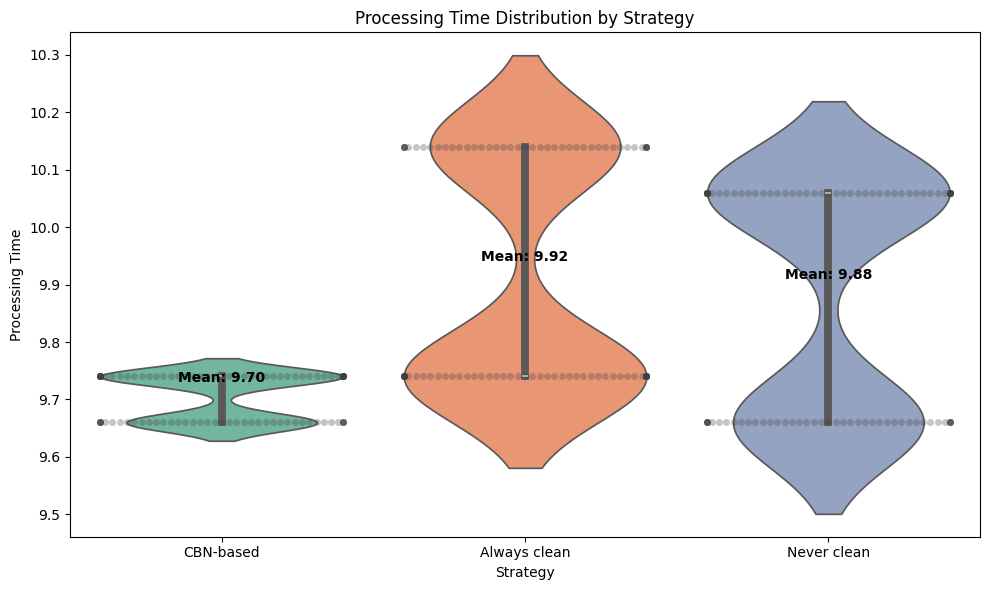

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data for seaborn
data = [
    *zip(cbn_times, ['CBN-based'] * len(cbn_times)),
    *zip(always_clean_times, ['Always clean'] * len(always_clean_times)),
    *zip(never_clean_times, ['Never clean'] * len(never_clean_times)),
]
all_times, strategies = zip(*data)

plt.figure(figsize=(10, 6))
sns.violinplot(x=strategies, y=all_times, inner="box", palette="Set2")
sns.swarmplot(x=strategies, y=all_times, color=".25", alpha=0.3)

# Plot means
means = [
    np.mean(cbn_times),
    np.mean(always_clean_times),
    np.mean(never_clean_times)
]
for i, mean in enumerate(means):
    plt.text(i, mean + 0.02, f"Mean: {mean:.2f}", ha='center', va='bottom', fontweight='bold', color='black')

plt.title("Processing Time Distribution by Strategy")
plt.ylabel("Processing Time")
plt.xlabel("Strategy")
plt.tight_layout()
plt.show()

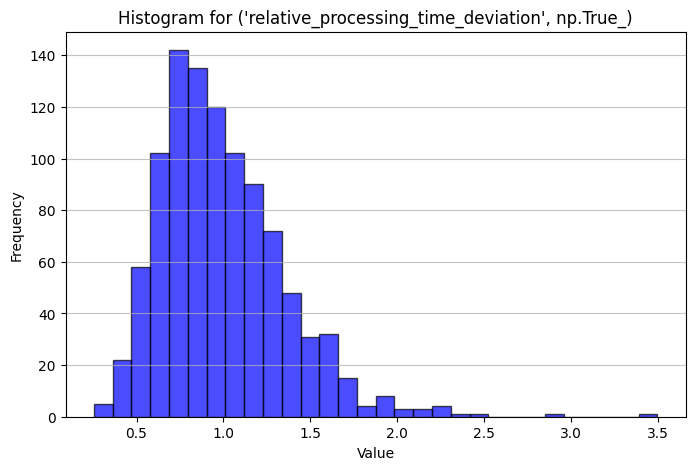

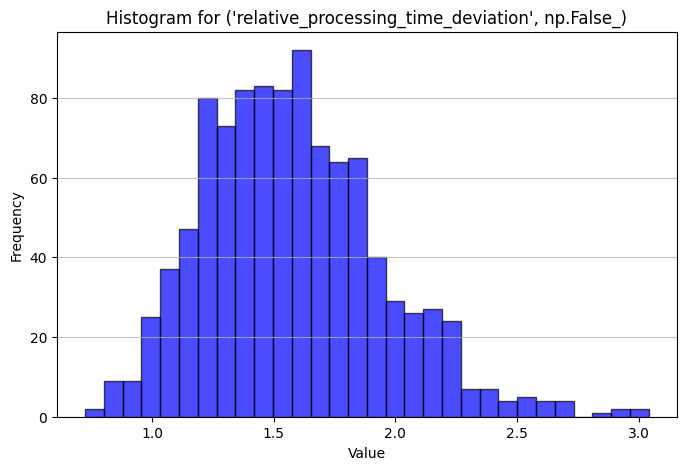

In [20]:
import pandas as pd#
import os
import numpy as np
import matplotlib.pyplot as plt
def read_from_csv(file): 
        """ Read dataset from CSV, handling errors gracefully. """
        if not file or not os.path.exists(file):
            raise FileExistsError(f"File not found: {file}.")

        try:
            data = pd.read_csv(file)
            data.drop(columns=data.columns[0], axis=1, inplace=True)
            return data
        except Exception as e:
            raise ImportError(f"Error reading file {file}: {e}")

data_truth = read_from_csv('./data/data_observe_TruthContinousSmallLogLearnModel.csv')
data_causal = read_from_csv('./data/data_observe_CausalContinousSmallLogLearnModel.csv')

def learn_distribution(data):
    distributions = {}
    # Filter data to only include the target variable and its parent variables
    target_variable = 'relative_processing_time_deviation'
    parent_variables = ['last_tool_change']
    relevant_columns = parent_variables + [target_variable]
    filtered_data = data[relevant_columns].dropna()

    # Iterate over all unique combinations of parent variable values
    parent_combinations = filtered_data[parent_variables].drop_duplicates()
    for _, combination in parent_combinations.iterrows():
        # Filter data for the current combination of parent variable values
        condition = (filtered_data[parent_variables] == combination.values).all(axis=1)
        subset = filtered_data[condition][[target_variable]].values.flatten()
        if len(subset) > 0:
            log_data = np.log(subset)
            mu = np.mean(log_data)  # Mean of log-transformed data
            sigma = np.std(log_data)  # Standard deviation of log-transformed data
            distributions[(target_variable, combination.values[0])] = {
                'mu': mu,
                'sigma': sigma
            }
        else:
            print(f"No data available for combination: {combination.values}")

    return distributions
# Learn the distribution from the data

truth_distributions = learn_distribution(data=data_truth)
causal_distributions = learn_distribution(data=data_causal)

org_distributions = {}
# Initialize distributions dictionary
# Define mean and variance for each combination of 'machine_state' and 'cleaning'
combinations = [
    (True, {'mu': -0.03939867427588333, 'sigma': 0.3435984167296766}),
    (False, {'mu': 0.4286333315626201, 'sigma': 0.22946751292240838})
]

# Populate the distributions dictionary
for last_tool_change, stats in combinations:
    org_distributions[('relative_processing_time_deviation', last_tool_change)] = stats

# Plot histograms for each sample
for key, value in causal_distributions.items():
    sample = np.random.lognormal(mean=value['mu'], sigma=value['sigma'], size=1000)
    plt.figure(figsize=(8, 5))
    plt.hist(sample, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram for {key}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


Causal parameters for ('relative_processing_time_deviation', np.True_): mu=-0.054801155275681995, sigma=0.34804763725584265
Truth parameters for ('relative_processing_time_deviation', np.True_): mu=-0.038709517702812425, sigma=0.3415378133505907
Original parameters for ('relative_processing_time_deviation', np.True_): mu=-0.03939867427588333, sigma=0.3435984167296766


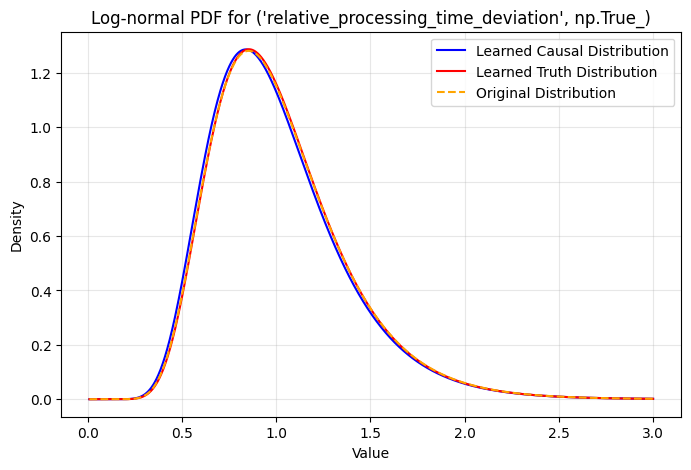

Causal parameters for ('relative_processing_time_deviation', np.False_): mu=0.4308603454617329, sigma=0.2314233142190304
Truth parameters for ('relative_processing_time_deviation', np.False_): mu=0.42017165547757307, sigma=0.22441212301196786
Original parameters for ('relative_processing_time_deviation', np.False_): mu=0.4286333315626201, sigma=0.22946751292240838


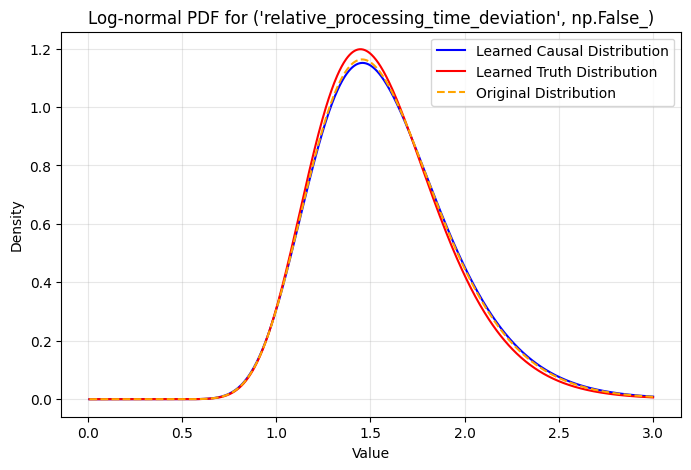

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Ensure org_distributions and distributions are defined as in your notebook

for key in causal_distributions:
    # Learned parameters
    mu_learned_causal = causal_distributions[key]['mu']
    sigma_learned_causal = causal_distributions[key]['sigma']
    
    # Original parameters (convert mean/variance to mu/sigma)
    if key in org_distributions:
        mu_org = org_distributions[key]['mu']
        sigma_org = org_distributions[key]['sigma']
        
    # Original parameters (convert mean/variance to mu/sigma)
    if key in truth_distributions:
        mu_learned_truth = truth_distributions[key]['mu']
        sigma_learned_truth = truth_distributions[key]['sigma']
        
    print(f"Causal parameters for {key}: mu={mu_learned_causal}, sigma={sigma_learned_causal}")    
    print(f"Truth parameters for {key}: mu={mu_learned_truth}, sigma={sigma_learned_truth}")
    print(f"Original parameters for {key}: mu={mu_org}, sigma={sigma_org}")
    # X range for plotting
    x = np.linspace(0.01, 3, 1000)
     # PDF for learned causal
    pdf_learned_causal = lognorm.pdf(x, s=sigma_learned_causal, scale=np.exp(mu_learned_causal))    
    # PDF for learned
    pdf_learned_truth = lognorm.pdf(x, s=sigma_learned_truth, scale=np.exp(mu_learned_truth))
    # PDF for original
    pdf_org = lognorm.pdf(x, s=sigma_org, scale=np.exp(mu_org))

    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf_learned_causal, label='Learned Causal Distribution', color='blue')
    plt.plot(x, pdf_learned_truth, label='Learned Truth Distribution', color='red')
    plt.plot(x, pdf_org, label='Original Distribution', color='orange', linestyle='--')
    plt.title(f'Log-normal PDF for {key}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

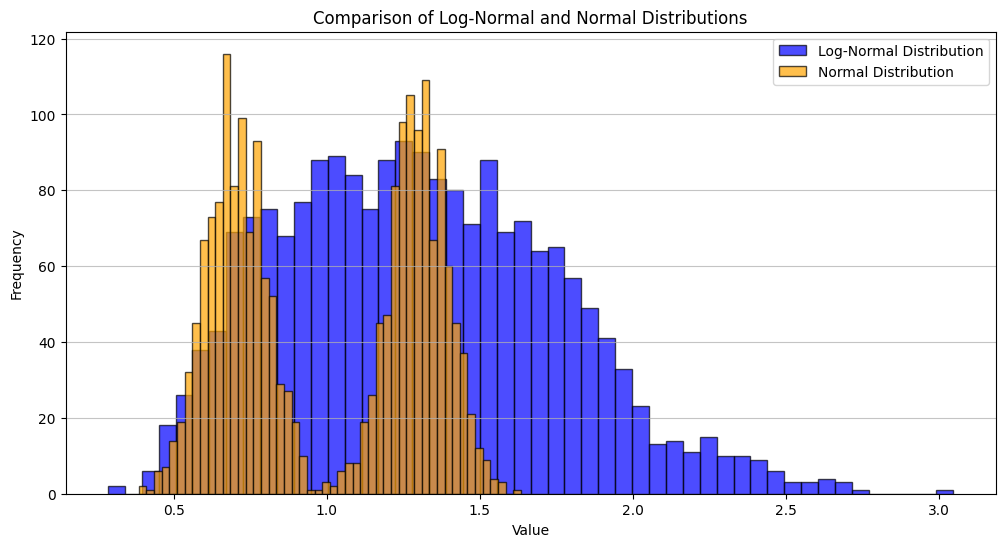

In [5]:
import numpy as np
from scipy.stats import lognorm

def create_log_distributions(self):
    # Initialize distributions dictionary
    distributions = {}

    # Define mean and variance for each combination of 'machine_state' and 'cleaning'
    combinations = [
        (True, {'mu': -0.03939867427588333, 'sigma': 0.3435984167296766}),
        (False, {'mu': 0.4286333315626201, 'sigma': 0.22946751292240838})
    ]

    # Populate the distributions dictionary
    for last_tool_change, stats in combinations:
        distributions[('relative_processing_time_deviation', last_tool_change)] = stats
        
    return distributions

def create_distributions(self):
    # Initialize distributions dictionary
    distributions = {}

    # Define mean and variance for each combination of 'machine_state' and 'cleaning'
    combinations = [
        (True, {'mean': 0.7, 'variance': 0.01}),
        (False, {'mean': 1.3, 'variance': 0.01})
    ]
    
    # Populate the distributions dictionary
    for last_tool_change, stats in combinations:
        distributions[('relative_processing_time_deviation', last_tool_change)] = stats
        
    return distributions

def learn_distributions(self, edges):
        # Filter data to only include the target variable and its parent variables
        target_variable = 'relative_processing_time_deviation'
        parent_variables = [edge[0] for edge in edges if edge[1] == target_variable]
        relevant_columns = parent_variables + [target_variable]
        filtered_data = self.data[relevant_columns].dropna()

        # Iterate over all unique combinations of parent variable values
        parent_combinations = filtered_data[parent_variables].drop_duplicates()
        for _, combination in parent_combinations.iterrows():
            # Filter data for the current combination of parent variable values
            condition = (filtered_data[parent_variables] == combination.values).all(axis=1)
            subset = filtered_data[condition][[target_variable]].values.flatten()
            if len(subset) > 0:
                log_data = np.log(subset)
                mu = np.mean(log_data)  # Mean of log-transformed data
                sigma = np.std(log_data)  # Standard deviation of log-transformed data
                self.distributions[(target_variable, combination.values[0])] = {
                    'mu': mu,
                    'sigma': sigma
                }
            else:
                self.logger.warning(f"No data available for combination: {combination.values}")
                
        print(f"{self.distributions}")

# Generate samples from create_log_distributions
log_distributions = create_log_distributions(None)
samples_log = []
for key, value in log_distributions.items():
    mu = value['mu']
    sigma = value['sigma']
    samples_log.extend(np.random.lognormal(mean=mu, sigma=sigma, size=1000))

# Generate samples from create_distributions
distributions = create_distributions(None)
samples_normal = []
for key, value in distributions.items():
    mean = value['mean']
    variance = value['variance']
    std_dev = np.sqrt(variance)
    samples_normal.extend(np.random.normal(loc=mean, scale=std_dev, size=1000))

# Plot the histograms
plt.figure(figsize=(12, 6))

# Histogram for log-normal samples
plt.hist(samples_log, bins=50, alpha=0.7, label='Log-Normal Distribution', color='blue', edgecolor='black')

# Histogram for normal samples
plt.hist(samples_normal, bins=50, alpha=0.7, label='Normal Distribution', color='orange', edgecolor='black')

plt.title('Comparison of Log-Normal and Normal Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
